Baixando dados...


C:\Users\mp604\AppData\Local\Temp\ipykernel_5128\2081422466.py:11: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Filtrando cidades...
Pré-processando...


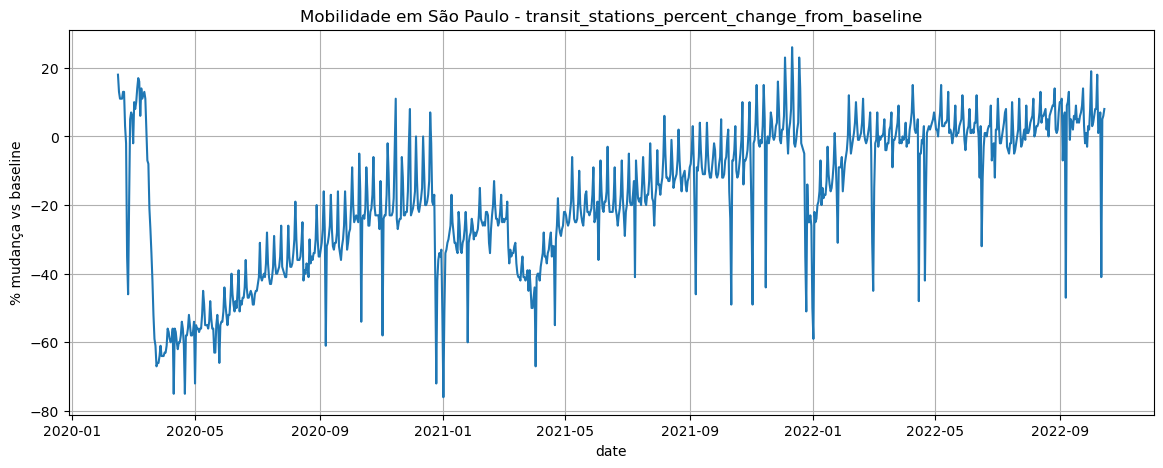

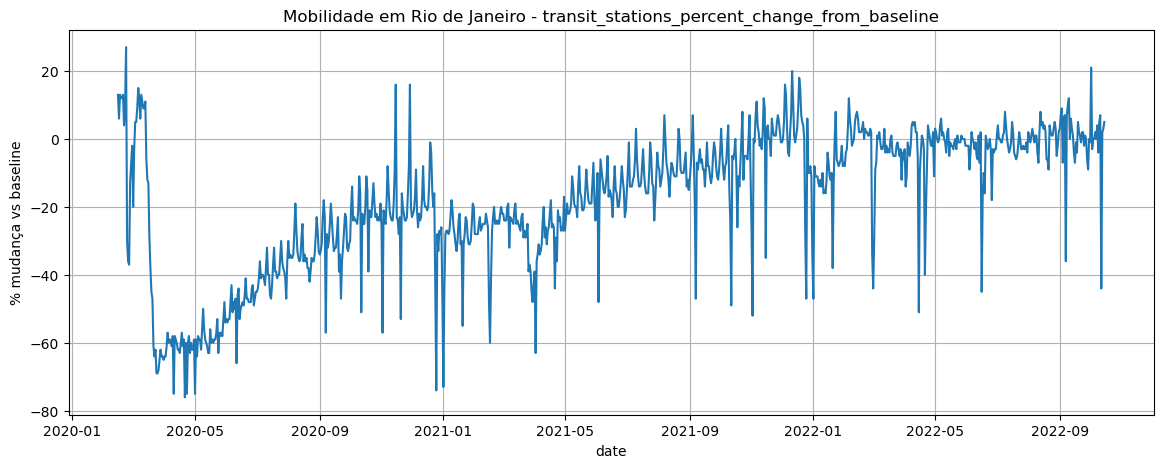

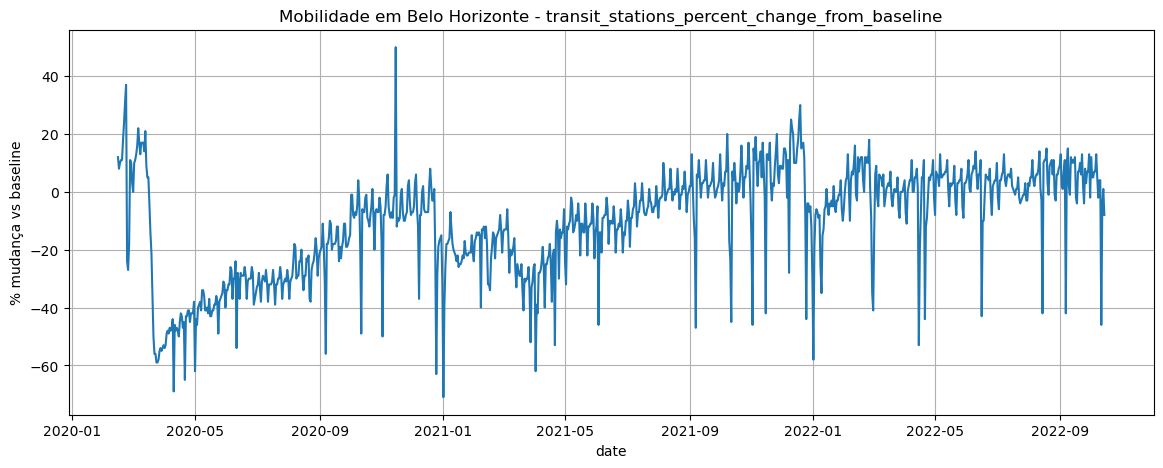

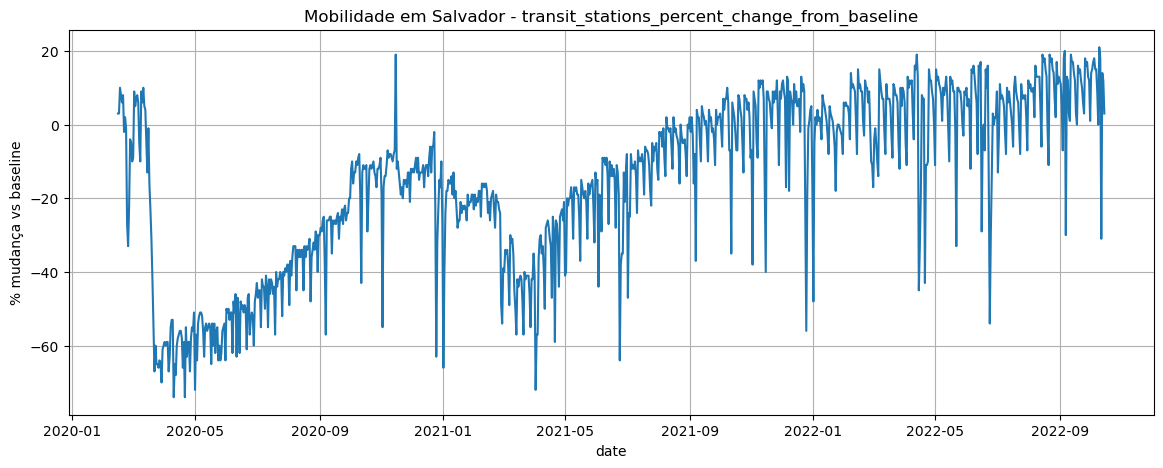

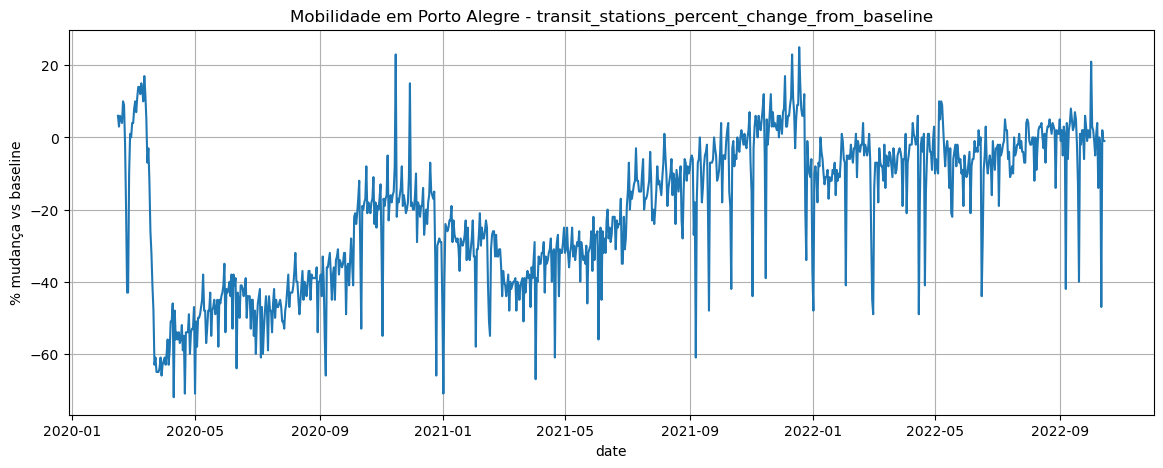

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
import zipfile

# 1. Baixar os dados de mobilidade do Google (global)
def baixar_mobilidade_google():
    url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
    df = pd.read_csv(url)
    return df

# 2. Filtrar dados do Brasil e de cidades específicas
def filtrar_dados_brasil(df, cidades):
    df_br = df[df['country_region'] == 'Brazil']
    df_br = df_br[df_br['sub_region_1'].notna() & df_br['sub_region_2'].notna()]
    df_br_cidades = df_br[df_br['sub_region_2'].isin(cidades)]
    return df_br_cidades

# 3. Pré-processamento
def preprocessar_dados(df):
    df['date'] = pd.to_datetime(df['date'])
    colunas_mobilidade = [
        'retail_and_recreation_percent_change_from_baseline',
        'grocery_and_pharmacy_percent_change_from_baseline',
        'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
        'workplaces_percent_change_from_baseline',
        'residential_percent_change_from_baseline'
    ]
    df = df[['date', 'sub_region_2'] + colunas_mobilidade]
    df = df.rename(columns={'sub_region_2': 'cidade'})
    return df

# 4. Visualização
def plotar_mobilidade(df, cidade, tipo='workplaces_percent_change_from_baseline'):
    df_cidade = df[df['cidade'] == cidade]
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=df_cidade, x='date', y=tipo)
    plt.title(f'Mobilidade em {cidade} - {tipo}')
    plt.ylabel('% mudança vs baseline')
    plt.grid(True)
    plt.show()

# 5. Execução
if __name__ == '__main__':
    cidades = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Salvador', 'Porto Alegre']
    print("Baixando dados...")
    df_raw = baixar_mobilidade_google()
    print("Filtrando cidades...")
    df_cidades = filtrar_dados_brasil(df_raw, cidades)
    print("Pré-processando...")
    df_mob = preprocessar_dados(df_cidades)
    
    # Exemplo de visualização
    for cidade in cidades:
        plotar_mobilidade(df_mob, cidade, tipo='transit_stations_percent_change_from_baseline')
        plotar_mobilidade(df_mob, cidade, tipo='workplaces_percent_change_from_baseline')
        plotar_mobilidade(df_mob, cidade, tipo='residential_percent_change_from_baseline')
